<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/3-calculus-i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus I: Limits & Derivatives

This topic, *Calculus I: Limits & Derivatives*, introduces the mathematical field of calculus -- the study of rates of change -- from the ground up. It is essential because computing derivatives via differentiation is the basis of optimizing most machine learning algorithms, including those used in deep learning such as backpropagation and stochastic gradient descent. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of how calculus is used to compute limits and differentiate functions. You’ll also learn how to apply automatic differentiation within the popular TensorFlow 2 and PyTorch machine learning libraries. The content covered in this class is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Calculus II* and *Optimization*.

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to more intimately grasp the details of machine learning papers as well as many of the other subjects that underlie ML, including partial-derivative calculus, statistics and optimization algorithms. 
* Compute the derivatives of functions, including by using AutoDiff in the popular TensorFlow 2 and PyTorch libraries.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Limits*

* What Calculus Is
* A Brief History of Calculus
* The Method of Exhaustion 
* Calculating Limits 

*Segment 2: Computing Derivatives with Differentiation*
* The Delta Method
* Basic Derivative Properties
* The Power Rule
* The Sum Rule
* The Product Rule
* The Quotient Rule
* The Chain Rule

*Segment 3: Automatic Differentiation*
* AutoDiff with PyTorch
* AutoDiff with TensorFlow 2
* Relating Differentiation to Machine Learning 
* Cost (or Loss) Functions
* The Future: Differentiable Programming 


## Segment 1: Limits

### The Calculus of Infinitesimals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

If $y = x^2 + 2x + 2$: 

In [3]:
y = x**2 + 2*x + 2

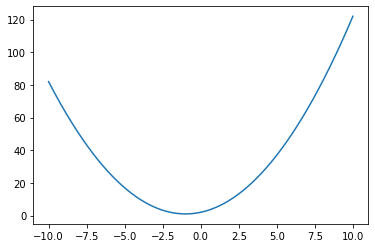

In [4]:
fig, ax = plt.subplots()
_ = ax.plot(x,y)

* There are no straight lines on the curve. 
* If we zoom in _infinitely_ close, however, we observe curves that _approach_ lines. 
* This enables us to find a slope $m$ (tangent) anywhere on the curve, including to identify where $m = 0$: 

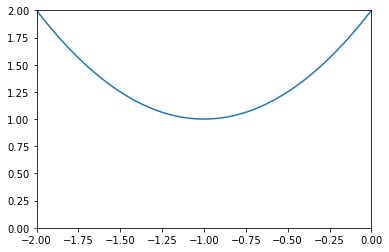

In [5]:
fig, ax = plt.subplots()
ax.set_xlim([-2, -0])
ax.set_ylim([0, 2])
_ = ax.plot(x,y)

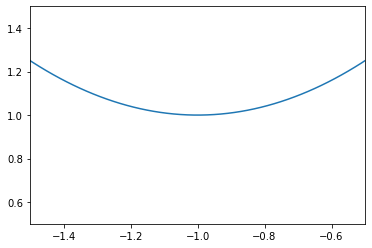

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([-1.5, -0.5])
ax.set_ylim([0.5, 1.5])
_ = ax.plot(x,y)

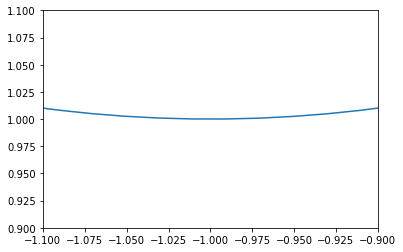

In [7]:
fig, ax = plt.subplots()
ax.set_xlim([-1.1, -0.9])
ax.set_ylim([0.9, 1.1])
_ = ax.plot(x,y)

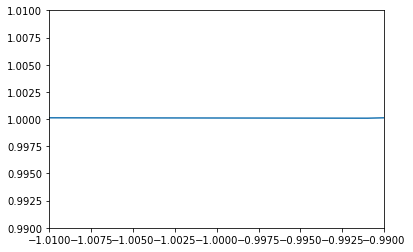

In [8]:
fig, ax = plt.subplots()
ax.set_xlim([-1.01, -0.99])
ax.set_ylim([0.99, 1.01])
_ = ax.plot(x,y)

**Return to slides here.**

### Limits

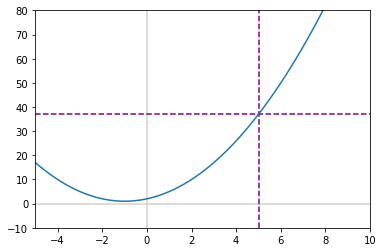

In [9]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-5, 10)
plt.ylim(-10, 80)
plt.axvline(x=5, color='purple', linestyle='--')
plt.axhline(y=37, color='purple', linestyle='--')
_ = ax.plot(x,y)

$$\lim_{x \to 1} \frac{x^2 - 1}{x - 1}$$

In [10]:
def my_fxn(my_x):
    my_y = (my_x**2 - 1)/(my_x - 1)
    return my_y

In [11]:
# Uncommenting the following line results in a 'division by zero' error:
# my_fxn(1)

In [12]:
my_fxn(0.9)

1.9

In [13]:
my_fxn(0.999)

1.9989999999999712

In [14]:
my_fxn(1.1)

2.1

In [15]:
my_fxn(1.001)

2.0009999999999177

In [16]:
y = my_fxn(x)

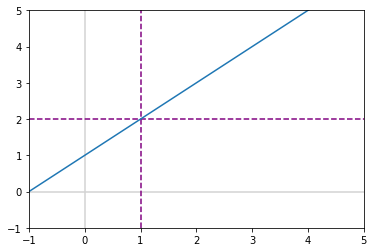

In [17]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axvline(x=1, color='purple', linestyle='--')
plt.axhline(y=2, color='purple', linestyle='--')
_ = ax.plot(x,y)

**Return to slides here.**

$$\lim_{x \to 0} \frac{\text{sin } x}{x}$$

In [18]:
def sin_fxn(my_x):
    my_y = np.sin(my_x)/my_x
    return my_y

In [19]:
# Uncommenting the following line results in a 'division by zero' error:
# y = sin_fxn(0)

In [20]:
sin_fxn(0.1)

0.9983341664682815

In [21]:
sin_fxn(0.001)

0.9999998333333416

In [22]:
sin_fxn(-0.1)

0.9983341664682815

In [23]:
sin_fxn(-0.001)

0.9999998333333416

In [24]:
y = sin_fxn(x)

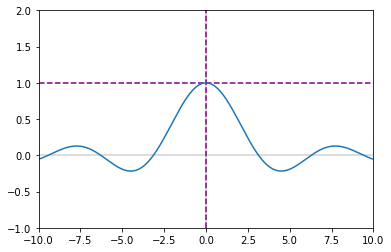

In [25]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-1, 2)
plt.axvline(x=0, color='purple', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')
_ = ax.plot(x,y)

**Return to slides here.**

$$ \lim_{x \to \infty} \frac{25}{x} $$

In [26]:
# x = np.linspace(-10, 10, 1000) # start, finish, n points

In [27]:
def inf_fxn(my_x):
    my_y = 25/my_x
    return my_y

In [28]:
y = inf_fxn(x)

In [29]:
inf_fxn(1e3)

0.025

In [30]:
inf_fxn(1e6)

2.5e-05

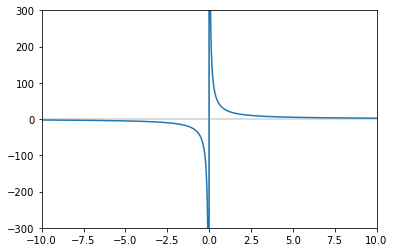

In [31]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
_ = ax.plot(x,y)

**Questions:**

Evaluate the limits below.

1. $$ \lim_{x \to 0} \frac{x^2-1}{x-1} $$
2. $$ \lim_{x \to -5} \frac{x^2+25}{x+5} $$
3. $$ \lim_{x \to 4} \frac{x^2 -2x -8}{x-4} $$
4. $$ \lim_{x \to -\infty} \frac{25}{x} $$
5. $$ \lim_{x \to 0} \frac{25}{x} $$

**Return to slides here.**

## Segment 2: Derivatives

Let's bring back our ol' buddy $y = x^2 + 2x + 2$:

In [32]:
def f(my_x):
    my_y = my_x**2 + 2*my_x + 2
    return my_y

In [33]:
y = f(x)

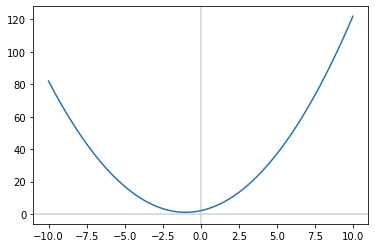

In [34]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(x,y)

Let's identify the slope where, say, $x = 2$.

First, let's determine what $y$ is: 

In [35]:
f(2)

10

Cool. Let's call this point $P$, which is located at (2, 10):

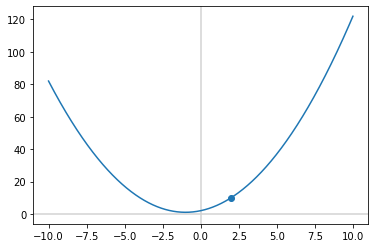

In [36]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10) # new
_ = ax.plot(x,y)

The _delta method_ uses the difference between two points to calculate slope. To illustrate this, let's define another point, $Q$ where, say, $x = 5$.

In [37]:
f(5)

37

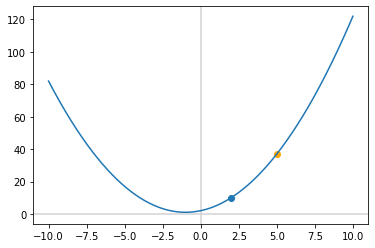

In [38]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c = 'orange') # new
_ = ax.plot(x,y)

To find the slope $m$ between points $P$ and $Q$: 
$$m = \frac{\text{change in }y}{\text{change in }x} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{37-10}{5-2} = \frac{27}{3} = 9$$

In [39]:
m = (37-10)/(5-2)
m

9.0

To plot the line that passes through $P$ and $Q$, we can rearrange the equation of a line $y = mx + b$ to solve for $b$: 
$$b = y - mx$$

In [40]:
b = 37-m*5
b

-8.0

In [41]:
line_y = m*x + b

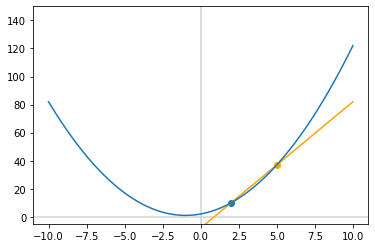

In [42]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c='orange')
plt.ylim(-5, 150) # new
plt.plot(x, line_y, c='orange') # new
_ = ax.plot(x,y)

The closer $Q$ becomes to $P$, the closer the slope $m$ comes to being the true tangent of the point $P$. Let's demonstrate this with another point $Q$ at $x = 2.1$.

Previously, our $\Delta x$ between $Q$ and $P$ was equal to 3. Now it is much smaller: $$\Delta x = x_2 - x_1 = 2.1 - 2 = 0.1 $$

In [43]:
f(2.1)

10.61

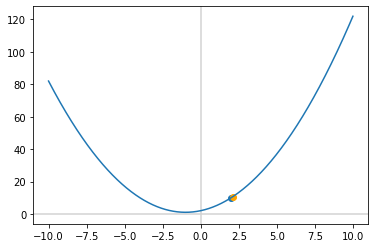

In [44]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c = 'orange')
_ = ax.plot(x,y)

In [45]:
m = (10.61-10)/(2.1-2)
m

6.099999999999989

In [46]:
b = 10.61-m*2.1
b

-2.199999999999978

In [47]:
line_y = m*x + b

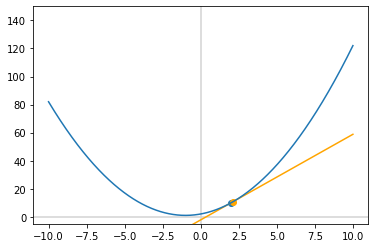

In [48]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c='orange')
plt.ylim(-5, 150)
plt.plot(x, line_y, c='orange')
_ = ax.plot(x,y)

The closer $Q$ becomes to $P$ (i.e., $\Delta x$ approaches 0), the clearer it becomes that the slope $m$ at point $P$ = (2, 10) is equal to 6.

Let's make $\Delta x$ extremely small, 0.0000001, to illustrate this:

In [49]:
delta_x = 0.000001
delta_x

1e-06

In [50]:
x1 = 2
y1 = 10

Rearranging $\Delta x = x_2 - x_1$, we can calculate $x_2$ for our point $Q$, which is now extremely close to $P$: 
$$x_2 = x_1 + \Delta x$$

In [51]:
x2 = x1 + delta_x
x2

2.000001

$y_2$ for our point $Q$ can be obtained with the usual function $f(x)$: 
$$y_2 = f(x_2)$$

In [52]:
y2 = f(x2)
y2

10.000006000001001

To find the slope $m$, we continue to use $$m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}$$

In [53]:
m = (y2 - y1)/(x2 - x1)
m

6.000001000088901

Boom! Using the delta method, we've shown that at point $P$, the slope of the curve is 6. 

**Exercise**: Using the delta method, find the slope of the tangent where $x = -1$.

**Don't cheat! The answer's a few cells below.**

In [54]:
x1 = -1

In [55]:
y1 = f(x1)
y1

1

Point $P$ is located at (-1, 1)

In [56]:
delta_x

1e-06

In [57]:
x2 = x1 + delta_x
x2

-0.999999

In [58]:
y2 = f(x2)
y2

1.000000000001

Quick aside: Pertinent to defining differentiation as an equation, an alternative way to calculate $y_2$ is $f(x + \Delta x)$

In [59]:
y2 = f(x1 + delta_x)
y2

1.000000000001

Point $Q$ is at (-0.999999, 1.000000000001), extremely close to $P$.

In [60]:
m = (y2-y1)/(x2-x1)
m

1.0000889005535828e-06

Therefore, as $x_2$ becomes infinitely close to $x_1$, it becomes clear that the slope $m$ at $x = -1$ is equal to zero. Let's plot it out: 

In [61]:
b = y2-m*x2
b

1.0000010000889006

In [62]:
line_y = m*x + b

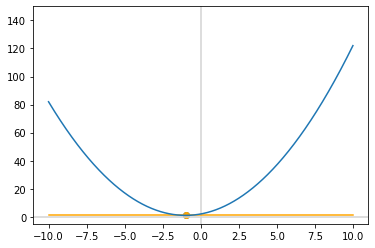

In [63]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(x1, y1)
plt.scatter(x2, y2, c='orange')
plt.ylim(-5, 150)
plt.plot(x, line_y, c='orange')
_ = ax.plot(x,y)

As $Q$ becomes infinitely close to $P$:
* $x_2$ - $x_1$ approaches 0
* In other words, $\Delta x$ approaches 0
* This can be denoted as $\Delta x \to 0$

Using the delta method, we've derived the definition of differentiation from first principles. The derivative of $y$ (denoted $dy$) with respect to $x$ (denoted $dx$) can be represented as: 
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$$

Expanding $\Delta y$ out to $y_2 - y_1$: 
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y_2 - y_1}{\Delta x}$$

Finally, replacing $y_1$ with $f(x)$ and replacing $y_2$ with $f(x + \Delta x)$, we obtain a common representation of differentiation:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Let's observe the differentiation equation in action: 

In [64]:
def diff_demo(my_f, my_x, my_delta):
    return (my_f(my_x + my_delta) - my_f(my_x)) / my_delta

In [65]:
deltas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

In [66]:
for delta in deltas:
    print(diff_demo(f, 2, delta))

7.0
6.099999999999994
6.009999999999849
6.000999999999479
6.000100000012054
6.000009999951316
6.000001000927568


In [67]:
for delta in deltas:
    print(diff_demo(f, -1, delta))

1.0
0.10000000000000009
0.009999999999998899
0.001000000000139778
9.99999993922529e-05
1.000000082740371e-05
1.000088900582341e-06


**Return to slides here.**

## Segment 3: Automatic Differentiation

**TensorFlow** and **PyTorch** are the two most popular automatic differentiation libraries.

Let's use them to calculate the $dy/dx$ at $x = 5$ where: 

$$y = x^2$$

$$ \frac{dy}{dx} = 2x = 2(5) = 10 $$

### Autodiff with PyTorch

In [68]:
import torch

In [69]:
x = torch.tensor(5.0)

In [70]:
x

tensor(5.)

In [71]:
x.requires_grad_() # contagiously track gradients through forward pass

tensor(5., requires_grad=True)

In [72]:
y = x**2

In [73]:
y.backward() # use autodiff

In [74]:
x.grad

tensor(10.)

### Autodiff with TensorFlow

In [75]:
import tensorflow as tf

In [76]:
x = tf.Variable(5.0)

In [77]:
with tf.GradientTape() as t:
    t.watch(x) # track forward pass
    y = x**2

In [78]:
t.gradient(y, x) # use autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

**Return to slides here.**

As usual, PyTorch feels more intuitive and pythonic than TensorFlow. See the standalone [*Regression in PyTorch*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb) notebook for an example of autodiff paired with gradient descent in order to fit a simple regression line.